/var/folders/1p/h1qfnx2d6ps1y_cqnnphbg_00000gn/T/ipykernel_1994/768215938.py:91: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  world.plot(


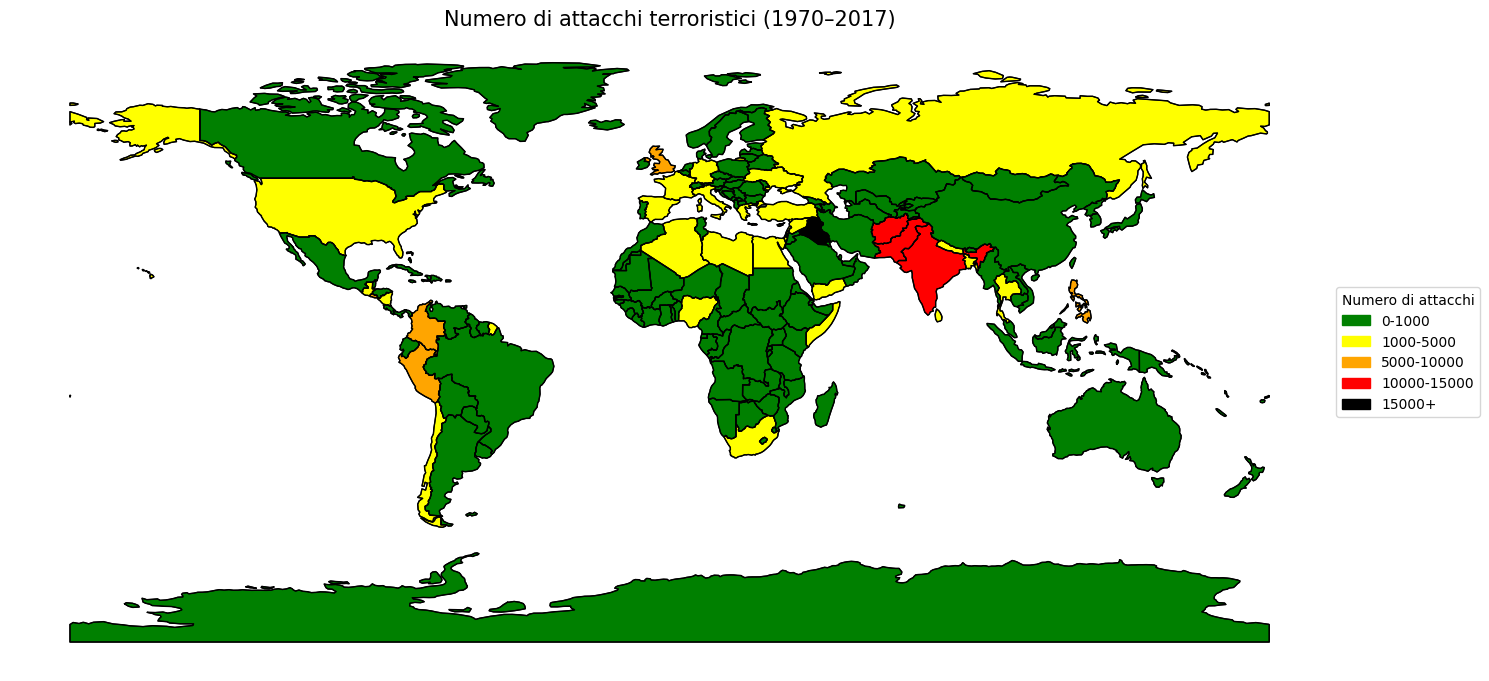

In [4]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from pathlib import Path

# Percorso dei file con Path (più semplice e chiara)
notebook_path = Path().resolve()
base_path = notebook_path.parent.parent 
data_path = base_path / 'data'
shp_path = data_path / 'ne_110m_admin_0_countries'
csv_path = data_path / 'globalterrorismdb.csv'

# Carichiamo i dati
world = gpd.read_file(shp_path)
df = pd.read_csv(csv_path, encoding='latin1', low_memory=False)

# Mappatura dei nomi per uniformare le nomenclature
country_mapping = {
    'United States': 'United States of America',
    'West Germany (FRG)': 'Germany',
    'East Germany (GDR)': 'Germany',
    'Soviet Union': 'Russia',
    'Yugoslavia': 'Serbia',
    'Czechoslovakia': 'Czechia',
    'South Vietnam': 'Vietnam',
    'North Yemen': 'Yemen',
    'South Yemen': 'Yemen',
    'Zaire': 'Democratic Republic of the Congo',
    'Ivory Coast': "Côte d'Ivoire",
    'Rhodesia': 'Zimbabwe',
    'Kosovo': 'Serbia',
    'Serbia-Montenegro': 'Serbia',
    'North Korea': 'Dem. Rep. Korea',
    'South Korea': 'South Korea',
    'Hong Kong': 'China'
}
df['country_txt'] = df['country_txt'].replace(country_mapping)

# Conta numero di attacchi per paese
attacks_per_country = df['country_txt'].value_counts().reset_index()
attacks_per_country.columns = ['country', 'attacks']

# Merge con shapefile per creare la geodataframe completa
world = world.merge(attacks_per_country, how='left', left_on='NAME', right_on='country')
world['attacks'] = world['attacks'].fillna(0)

# Crea classi di numero di attacchi
def classify_attack(attacks):
    if attacks < 1000:
        return '0-1000'
    elif attacks < 5000:
        return '1000-5000'
    elif attacks < 10000:
        return '5000-10000'
    elif attacks < 15000:
        return '10000-15000'
    else:
        return '15000+'

world['attack_range'] = world['attacks'].apply(classify_attack)

# Mappa colori
color_map = {
    '0-1000': 'green',
    '1000-5000': 'yellow',
    '5000-10000': 'orange',
    '10000-15000': 'red',
    '15000+': 'black'
}

# Plot della mappa
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax, linewidth=0.8, color='black')  # confini
world.plot(
    column='attack_range',
    ax=ax,
    color=world['attack_range'].map(color_map),
    edgecolor='black'
)

ax.set_title('Numero di attacchi terroristici (1970–2017)', fontsize=15)
ax.axis('off')

# Legenda 
legend_patches = [
    mpatches.Patch(color=color, label=label)
    for label, color in color_map.items()
]
ax.legend(handles=legend_patches, title='Numero di attacchi',
          loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

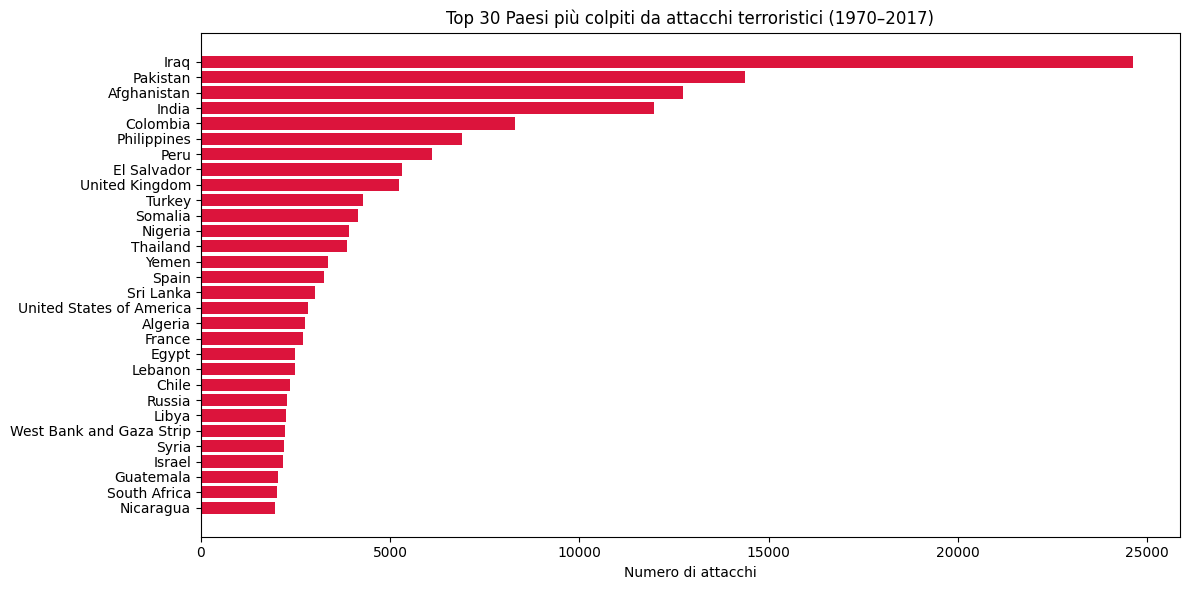

In [6]:
# Conta gli attacchi per paese
attacks_per_country = df['country_txt'].value_counts().reset_index()
attacks_per_country.columns = ['country', 'attacks']

# Se vuoi vedere i primi 20 basta cambiare il numero
top_countries = attacks_per_country.head(30)

# Plot
plt.figure(figsize=(12,6))
plt.barh(top_countries['country'][::-1], top_countries['attacks'][::-1], color='crimson')
plt.xlabel('Numero di attacchi')
plt.title('Top 30 Paesi più colpiti da attacchi terroristici (1970–2017)')
plt.tight_layout()
plt.savefig('nomefile.png', dpi=300, bbox_inches='tight')
plt.show()